In [1]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import re
import math
from docx import Document

# import packages for data visulatzation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# modeling routines from Scikit Learn packages for model develipment
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix , accuracy_score , classification_report, make_scorer,recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import regularizers

# obtain precision, recall, F1, and support metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# specify the set of classifiers being evaluated
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings("ignore")
# set KMP_DUPLICATE_LIB_OK=TRUE      #  Windows
# set up randam seed
random_seed = 55
import tensorflow as tf
import torch
import platform

from sklearn.impute import KNNImputer
import pickle
df_input = pd.read_csv("E:/CNSI_project/demo_and_data_5.0/aim1_dataset_v2.2.csv")

In [2]:
model_data_RF = df_input.copy()
model_data_RF['count'] = model_data_RF.count(axis=1)
model_data_RF['count'].value_counts().sort_index()

12      22
13      97
14     449
15     739
16    1255
17    1475
18    1058
19    1004
20     805
21     717
22     534
23     337
24     285
25     228
26     173
27      68
28      15
Name: count, dtype: int64

In [3]:
model_data_RF = df_input.copy()
model_data_RF = model_data_RF.dropna(thresh=(model_data_RF.shape[1]-1)*0.4, axis=0)
print(model_data_RF.culture.value_counts())
model_data_RF

0    8857
1     404
Name: culture, dtype: int64


,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,culture_old,C_LeukocyteCount,culture
0,NaN,NaN,0.7,92.0,NaN,NaN,NaN,3.7,144.0,11.7,...,NaN,100.0,NaN,0.0,NaN,NaN,NaN,0,1.00,0
1,NaN,3.6,0.6,95.0,NaN,NaN,187.0,3.7,137.0,12.6,...,NaN,43.0,2.0,17.0,NaN,NaN,NaN,0,3.76,0
2,NaN,2.6,1.2,76.0,NaN,NaN,NaN,4.9,137.0,9.7,...,NaN,41.0,49.0,10.0,16.0,13.0,2.0,0,10.00,0
3,NaN,NaN,0.8,105.0,NaN,NaN,NaN,3.9,142.0,15.3,...,NaN,62.0,NaN,0.0,NaN,NaN,NaN,0,1.00,0
4,NaN,4.9,1.0,111.0,12.0,2.0,NaN,4.6,128.0,8.4,...,45.3,96.0,NaN,1.0,19.0,9.0,3.0,0,142.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,NaN,NaN,0.8,155.0,NaN,NaN,NaN,3.6,137.0,11.6,...,NaN,0.0,NaN,100.0,NaN,NaN,NaN,0,18600.00,1
9257,NaN,NaN,0.7,140.0,NaN,NaN,180.0,3.7,140.0,13.0,...,NaN,1.0,NaN,90.0,NaN,NaN,NaN,0,7800.00,1
9258,NaN,2.3,0.7,53.0,NaN,NaN,NaN,3.8,135.0,10.7,...,NaN,88.0,NaN,8.0,NaN,NaN,NaN,0,3.00,0
9259,99.0,3.4,0.8,87.0,8.0,5.0,453.0,3.9,145.0,11.0,...,53.9,55.0,NaN,9.0,NaN,NaN,NaN,0,0.00,0


In [5]:
df_train, df_test = train_test_split(model_data_RF, test_size=0.2, random_state = random_seed, stratify=model_data_RF['culture'])

In [6]:
df_train = df_train.drop(columns=['culture_old'], axis=1)
df_test = df_test.drop(columns=['culture_old'], axis=1)
df_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
5161,NaN,NaN,0.5,102.0,3.0,1.0,NaN,4.0,142.0,10.4,...,NaN,66.2,45.0,NaN,37.0,16.0,0.0,3.0,2.00,0
3039,41.0,NaN,0.6,296.0,8.0,1.0,NaN,3.5,138.0,12.1,...,NaN,42.9,8.0,NaN,90.0,18.0,0.0,2.0,152.51,0
1241,NaN,NaN,1.0,89.0,8.0,1.0,NaN,4.2,146.0,14.7,...,NaN,48.0,13.0,NaN,65.0,16.0,4.0,2.0,5.00,0
4588,488.0,3.2,0.6,96.0,16.0,0.0,NaN,4.0,142.0,10.6,...,0.5,42.5,78.0,NaN,0.0,NaN,NaN,NaN,4.00,0
5002,NaN,NaN,0.8,118.0,NaN,NaN,201.0,4.8,134.0,10.9,...,NaN,NaN,77.0,NaN,0.0,NaN,NaN,NaN,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,101.0,NaN,0.5,139.0,NaN,NaN,NaN,5.4,141.0,8.4,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.00,0
6744,118.0,2.8,2.1,119.0,NaN,NaN,NaN,3.5,140.0,9.3,...,NaN,NaN,37.0,NaN,23.0,NaN,NaN,NaN,1.00,0
3350,NaN,NaN,0.9,90.0,1.0,2.0,NaN,4.4,138.0,12.3,...,0.4,43.4,91.0,NaN,1.0,NaN,NaN,NaN,8.24,0
7565,NaN,3.4,0.9,110.0,NaN,NaN,231.0,4.4,137.0,11.4,...,NaN,NaN,40.0,NaN,0.0,NaN,NaN,NaN,1.00,0


In [7]:
# Null fill
columns1 = df_train.columns
index1 = df_train.index
columns2 = df_test.columns
index2 = df_test.index

imputer = KNNImputer(n_neighbors=5, weights='distance')
df_train = imputer.fit_transform(df_train)
df_test = imputer.transform(df_test)

# Save the imputer as a pickle file for later recall.
with open("E:/CNSI_project/demo_and_data_5.0/Processed_data/StandardPickleFiles/imputer_KNNImputer_corrected_aim1_RF.pickle","wb") as f:
    pickle.dump(imputer, f)

# change to DataFrame
df_train = pd.DataFrame(df_train, columns=columns1, index=index1)
df_train['culture'] = df_train['culture'].astype(np.int16)
df_test = pd.DataFrame(df_test, columns=columns2, index=index2)
df_test['culture'] = df_test['culture'].astype(np.int16)

df_train

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
7750,164.861306,3.568161,1.2,89.0,13.576104,1.000000,323.382724,3.9,139.0,14.600000,...,0.359854,46.821888,0.0,47.789709,0.0,18.398942,4.648779,2.231575,0.0,0
6815,131.092220,3.500000,0.7,100.0,3.472229,1.000000,260.514920,3.6,139.0,10.778202,...,0.602125,42.831793,84.0,3.263301,5.0,20.000000,10.000000,3.000000,331.0,0
1899,80.732539,3.885816,0.8,86.0,3.409343,0.170611,279.815612,4.3,143.0,12.800000,...,1.120276,44.952127,87.0,12.442675,0.0,16.134748,6.602625,2.040953,7.0,0
1329,152.675648,3.277528,0.7,90.0,62.000000,1.000000,977.789780,4.4,138.0,12.200000,...,0.400000,44.600000,89.0,6.741769,1.0,18.000000,10.000000,3.000000,84.0,0
3067,66.308087,3.293111,0.8,217.0,5.967246,1.000000,366.239816,5.3,132.0,13.600000,...,0.651626,43.837813,81.0,19.250751,0.0,17.384719,6.827905,2.482113,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,132.626085,4.161359,0.6,122.0,6.105743,0.593055,238.000000,4.3,142.0,11.700000,...,1.149714,50.055126,0.0,33.694677,0.0,22.061047,5.107893,2.131108,0.0,0
8632,115.058685,4.052933,0.6,171.0,1.000000,1.000000,310.506916,4.0,133.0,10.400000,...,0.720848,50.600000,4.0,2.000000,90.0,16.486458,3.907127,1.705198,397.0,0
7024,98.000000,3.695499,1.7,154.0,9.000000,0.000000,168.609002,4.0,145.0,8.400000,...,0.774213,62.600000,71.0,31.202659,0.0,16.000000,5.000000,2.000000,2.0,0
6492,126.194457,3.878446,0.6,112.0,1.000000,0.000000,300.230424,3.5,136.0,11.000000,...,0.571249,48.600000,65.0,1.000000,22.0,20.000000,3.442474,2.000000,49.0,0


In [8]:
df_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
5161,78.778042,3.665183,0.5,102.0,3.000000,1.000000,272.779470,4.0,142.0,10.4,...,0.940144,66.200000,45.0,6.972972,37.0,16.000000,0.000000,3.000000,2.00,0
3039,41.000000,3.338679,0.6,296.0,8.000000,1.000000,265.882295,3.5,138.0,12.1,...,1.156379,42.900000,8.0,3.681771,90.0,18.000000,0.000000,2.000000,152.51,0
1241,145.582288,3.414762,1.0,89.0,8.000000,1.000000,272.467251,4.2,146.0,14.7,...,0.344816,48.000000,13.0,11.938609,65.0,16.000000,4.000000,2.000000,5.00,0
4588,488.000000,3.200000,0.6,96.0,16.000000,0.000000,359.488047,4.0,142.0,10.6,...,0.500000,42.500000,78.0,17.757443,0.0,18.578515,3.726252,2.005075,4.00,0
5002,142.038290,3.486210,0.8,118.0,3.924398,0.632547,201.000000,4.8,134.0,10.9,...,1.484435,45.241190,77.0,12.425268,0.0,17.823758,3.275113,2.396721,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,101.000000,3.861070,0.5,139.0,6.759416,0.754793,367.977942,5.4,141.0,8.4,...,1.416105,48.248408,0.0,35.226360,0.0,18.344292,5.827183,2.122913,0.00,0
6744,118.000000,2.800000,2.1,119.0,4.425524,0.801898,390.011174,3.5,140.0,9.3,...,2.103880,46.889328,37.0,19.177778,23.0,18.894420,5.287765,2.000000,1.00,0
3350,167.550523,4.003031,0.9,90.0,1.000000,2.000000,178.919888,4.4,138.0,12.3,...,0.400000,43.400000,91.0,10.295387,1.0,17.221728,2.202020,2.802475,8.24,0
7565,153.767014,3.400000,0.9,110.0,18.914176,1.000000,231.000000,4.4,137.0,11.4,...,0.642561,42.085143,40.0,31.294515,0.0,19.497362,8.021703,2.650073,1.00,0


In [9]:
aaa = 1

In [10]:
if aaa < 100:
    data_X, data_y = df_train.iloc[:,:-1], df_train.iloc[:,-1:]
    from imblearn.over_sampling import SMOTE
    from collections import Counter 
    # smote = SMOTE()
    # data_X, data_y = smote.fit_resample(data_X, data_y)

    from imblearn.under_sampling import RandomUnderSampler
    proportion = 1/aaa 
    rus = RandomUnderSampler(sampling_strategy=proportion, random_state=random_seed)  # 
    data_X, data_y = rus.fit_resample(data_X, data_y)

    df_train = shuffle(pd.concat([data_X, data_y], axis=1), random_state=random_seed)
df_train

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,culture
235,149.476192,4.437923,0.6,93.0,53.027711,0.429286,233.728219,4.3,136.0,13.7,...,0.439550,41.103550,73.0,13.362788,0.0,16.864209,4.784115,2.170002,2.00,0
516,138.000000,3.333481,1.4,240.0,0.000000,0.000000,224.551198,3.5,148.0,8.6,...,0.997305,46.500000,5.0,5.048984,92.0,22.000000,6.035319,2.000000,84.00,1
586,38.000000,3.343626,1.1,99.0,4.000000,0.000000,291.104813,5.3,145.0,8.1,...,1.308721,58.100000,17.0,25.933068,70.0,17.261646,2.147089,2.490681,4.90,1
239,169.266480,3.500000,1.4,237.0,54.927450,1.000000,1289.000000,3.8,147.0,7.9,...,0.835079,50.443695,87.0,4.000000,0.0,18.788135,2.126749,1.803556,2.00,0
88,169.056781,3.653035,0.9,149.0,7.024778,1.000000,225.286481,3.7,137.0,13.9,...,0.349407,45.616610,92.0,7.031069,0.0,16.000000,0.000000,2.000000,46.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,192.285587,4.064642,0.6,192.0,6.000000,0.000000,205.380854,3.4,137.0,11.6,...,0.400000,39.700000,90.0,1.000000,0.0,16.000000,0.000000,3.000000,5.05,1
37,178.561883,3.500000,1.2,99.0,24.425808,1.000000,254.973897,4.5,139.0,10.4,...,0.460227,41.972311,69.0,12.000000,17.0,19.021117,4.676392,2.046180,13.00,0
541,169.244043,3.824767,0.7,107.0,7.285221,0.287100,229.653541,4.5,135.0,13.9,...,2.079418,47.200000,28.0,45.000000,27.0,16.515922,2.875310,1.000000,51.00,1
295,159.701440,2.800000,1.4,140.0,16.000000,2.000000,295.095485,3.4,147.0,9.9,...,0.640871,52.500000,50.0,23.253730,0.0,14.000000,0.000000,2.000000,1.00,0


In [11]:
df_train.culture.value_counts()

0    323
1    323
Name: culture, dtype: int64

In [12]:
df_test.culture.value_counts()

0    1772
1      81
Name: culture, dtype: int64

In [13]:
enc_label = OneHotEncoder(categories=[[0,1],])
transformed_label = enc_label.fit_transform(df_train.iloc[:,[-1]]).toarray()
transformed_label = pd.DataFrame(transformed_label, columns=['Label_CultureN','Label_CultureP'], index=df_train.index)
df_train = df_train.drop(['culture'], axis=1)
df_train = pd.concat([df_train,transformed_label], axis=1)
df_train

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,Label_CultureN,Label_CultureP
235,149.476192,4.437923,0.6,93.0,53.027711,0.429286,233.728219,4.3,136.0,13.7,...,41.103550,73.0,13.362788,0.0,16.864209,4.784115,2.170002,2.00,1.0,0.0
516,138.000000,3.333481,1.4,240.0,0.000000,0.000000,224.551198,3.5,148.0,8.6,...,46.500000,5.0,5.048984,92.0,22.000000,6.035319,2.000000,84.00,0.0,1.0
586,38.000000,3.343626,1.1,99.0,4.000000,0.000000,291.104813,5.3,145.0,8.1,...,58.100000,17.0,25.933068,70.0,17.261646,2.147089,2.490681,4.90,0.0,1.0
239,169.266480,3.500000,1.4,237.0,54.927450,1.000000,1289.000000,3.8,147.0,7.9,...,50.443695,87.0,4.000000,0.0,18.788135,2.126749,1.803556,2.00,1.0,0.0
88,169.056781,3.653035,0.9,149.0,7.024778,1.000000,225.286481,3.7,137.0,13.9,...,45.616610,92.0,7.031069,0.0,16.000000,0.000000,2.000000,46.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,192.285587,4.064642,0.6,192.0,6.000000,0.000000,205.380854,3.4,137.0,11.6,...,39.700000,90.0,1.000000,0.0,16.000000,0.000000,3.000000,5.05,0.0,1.0
37,178.561883,3.500000,1.2,99.0,24.425808,1.000000,254.973897,4.5,139.0,10.4,...,41.972311,69.0,12.000000,17.0,19.021117,4.676392,2.046180,13.00,1.0,0.0
541,169.244043,3.824767,0.7,107.0,7.285221,0.287100,229.653541,4.5,135.0,13.9,...,47.200000,28.0,45.000000,27.0,16.515922,2.875310,1.000000,51.00,0.0,1.0
295,159.701440,2.800000,1.4,140.0,16.000000,2.000000,295.095485,3.4,147.0,9.9,...,52.500000,50.0,23.253730,0.0,14.000000,0.000000,2.000000,1.00,1.0,0.0


In [14]:
# transform the test dataset
transformed_label = enc_label.transform(df_test.iloc[:,[-1]]).toarray()
transformed_label = pd.DataFrame(transformed_label, columns=['Label_CultureN','Label_CultureP'], index=df_test.index)
df_test = df_test.drop(['culture'], axis=1)
df_test = pd.concat([df_test,transformed_label], axis=1)
df_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount,Label_CultureN,Label_CultureP
5161,78.778042,3.665183,0.5,102.0,3.000000,1.000000,272.779470,4.0,142.0,10.4,...,66.200000,45.0,6.972972,37.0,16.000000,0.000000,3.000000,2.00,1.0,0.0
3039,41.000000,3.338679,0.6,296.0,8.000000,1.000000,265.882295,3.5,138.0,12.1,...,42.900000,8.0,3.681771,90.0,18.000000,0.000000,2.000000,152.51,1.0,0.0
1241,145.582288,3.414762,1.0,89.0,8.000000,1.000000,272.467251,4.2,146.0,14.7,...,48.000000,13.0,11.938609,65.0,16.000000,4.000000,2.000000,5.00,1.0,0.0
4588,488.000000,3.200000,0.6,96.0,16.000000,0.000000,359.488047,4.0,142.0,10.6,...,42.500000,78.0,17.757443,0.0,18.578515,3.726252,2.005075,4.00,1.0,0.0
5002,142.038290,3.486210,0.8,118.0,3.924398,0.632547,201.000000,4.8,134.0,10.9,...,45.241190,77.0,12.425268,0.0,17.823758,3.275113,2.396721,1.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,101.000000,3.861070,0.5,139.0,6.759416,0.754793,367.977942,5.4,141.0,8.4,...,48.248408,0.0,35.226360,0.0,18.344292,5.827183,2.122913,0.00,1.0,0.0
6744,118.000000,2.800000,2.1,119.0,4.425524,0.801898,390.011174,3.5,140.0,9.3,...,46.889328,37.0,19.177778,23.0,18.894420,5.287765,2.000000,1.00,1.0,0.0
3350,167.550523,4.003031,0.9,90.0,1.000000,2.000000,178.919888,4.4,138.0,12.3,...,43.400000,91.0,10.295387,1.0,17.221728,2.202020,2.802475,8.24,1.0,0.0
7565,153.767014,3.400000,0.9,110.0,18.914176,1.000000,231.000000,4.4,137.0,11.4,...,42.085143,40.0,31.294515,0.0,19.497362,8.021703,2.650073,1.00,1.0,0.0


In [15]:
df_train.Label_CultureP.value_counts()

0.0    323
1.0    323
Name: Label_CultureP, dtype: int64

In [16]:
df_test.Label_CultureP.value_counts()

0.0    1772
1.0      81
Name: Label_CultureP, dtype: int64

# 2.1 Classification

In [17]:
# assign columns into predictors and labels
predictor_list = list(df_train.columns)[:-2]
print(predictor_list,"\n")
label1_list = list(df_train.columns)[-2:]
print(label1_list)

['B_pO2', 'B_Albumin', 'B_Creatinine', 'B_Glucose', 'B_H', 'B_I', 'B_LactateDehydrogenase', 'B_Potassium', 'B_Sodium', 'B_Hemoglobin', 'B_lymphocytes', 'B_MCHC', 'B_MonocytesPercentage', 'B_Platelet', 'B_PTT', 'C_Glucose', 'C_Protein', 'B_MonocyteCount', 'B_ImmatureGranulocytes', 'B_RDW-SD', 'C_Lymphs', 'C_Macrophage', 'C_Polys', 'resprate', 'pain', 'acuity', 'C_LeukocyteCount'] 

['Label_CultureN', 'Label_CultureP']


In [18]:
# generate X subsets for Modelling 
X_train = df_train.filter(predictor_list, axis = 1)
X_test = df_test.filter(predictor_list, axis = 1)
print(X_train.shape, X_test.shape)

(646, 27) (1853, 27)


In [19]:
# generate Y subsets for Modelling 
y1_train = df_train.filter(label1_list)
y1_test = df_test.filter(label1_list)
print(y1_train.shape, y1_test.shape)

(646, 2) (1853, 2)


# Grid Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 1000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 50, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10, 15, 20,25, 30,35, 40,45, 50,55,60,65,70]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 15, 20, 25, 30,35,40]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# set data balance or not
class_weight = ["balanced", "balanced_subsample"]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight
              }
print(random_grid)

{'n_estimators': [30, 49, 69, 89, 109, 128, 148, 168, 188, 208, 227, 247, 267, 287, 307, 326, 346, 366, 386, 406, 425, 445, 465, 485, 505, 524, 544, 564, 584, 604, 623, 643, 663, 683, 703, 722, 742, 762, 782, 802, 821, 841, 861, 881, 901, 920, 940, 960, 980, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27, 30, 32, 35, 37, 40, 42, 45, 47, 50, None], 'min_samples_split': [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 15, 20, 25, 30, 35, 40], 'bootstrap': [True, False], 'class_weight': ['balanced', 'balanced_subsample']}


In [543]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Create a scorer for recall
# scorer = make_scorer(recall_score)   # In scikit-learn, the 'Sensitivity' scoring metric is not available by default. You can use the 'recall' metric, which is equivalent to sensitivity in a binary classification setting.
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

# rf = RandomForestRegressor()
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 300, cv = 4, verbose=2, random_state=42, n_jobs = 10)  #, scoring=scorer n_jobs表示线程数的设置，-1表示用所有的线程。
# Fit the random search model
rf_random.fit(X_train, y1_train) 

Fitting 4 folds for each of 300 candidates, totalling 1200 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=300,
                   n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [3, 5, 7, 10, 12, 15, 17,
                                                      20, 22, 25, 27, 30, 32,
                                                      35, 37, 40, 42, 45, 47,
                                                      50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             12, 15, 20, 25, 30,
                                                             35, 40],
                                        'min_samples_split': [1, 2, 5, 10, 

In [544]:
rf_random.best_params_

{'n_estimators': 485,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 47,
 'class_weight': 'balanced_subsample',
 'bootstrap': False}

In [545]:
# calculate evaluation metric using test cohort
best_random = rf_random.best_estimator_
#base_model.fit(X_train, y1_train) 
y1_predict = best_random.predict(X_test)
accuracy0 = np.round(accuracy_score(y1_test.values.argmax(axis=1), 
               y1_predict.argmax(axis=1)), decimals = 5)
print('Best Random Forest Predictive Accuracy: ',accuracy0)

Best Random Forest Predictive Accuracy:  0.85267


In [546]:
# calculate evaluation metric using test cohort
base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(X_train, y1_train) 
y1_predict = base_model.predict(X_test)

accuracy1 = np.round(accuracy_score(y1_test.values.argmax(axis=1), 
               y1_predict.argmax(axis=1)), decimals = 5)
print('base Random Forest Predictive Accuracy: ',accuracy1)

base Random Forest Predictive Accuracy:  0.83972


In [547]:
# save the model
import joblib
# joblib.dump(best_random, '')

In [548]:
print('Improvement of {:0.5f}%.'.format( 100 * (accuracy0 - accuracy1) / accuracy1))

Improvement of 1.54218%.


In [21]:
# upload the model
import joblib
best_random = joblib.load()

In [22]:
# temp added
rf_model = best_random

# 2.2 Evaluation

In [23]:
# calculate individual weight of each predictor in this model
predictor_listname = predictor_list
rf_model_results = pd.DataFrame({'name': predictor_listname, 
                                 'description': predictor_list,
                                 'importance': rf_model.feature_importances_})    

rf_model_results.sort_values(by=['importance'], inplace=True)
rf_model_results

,name,description,importance
4,B_H,B_H,0.005336
8,B_Sodium,B_Sodium,0.008521
0,B_pO2,B_pO2,0.008815
14,B_PTT,B_PTT,0.009532
3,B_Glucose,B_Glucose,0.010805
13,B_Platelet,B_Platelet,0.011501
11,B_MCHC,B_MCHC,0.013081
2,B_Creatinine,B_Creatinine,0.013095
12,B_MonocytesPercentage,B_MonocytesPercentage,0.014105
5,B_I,B_I,0.015529


In [24]:
# rf_model_results.to_csv("E:/CNSI_project/demo_and_data_5.0/importance_labelnew.csv")

In [25]:
results_filtered = rf_model_results[rf_model_results['importance']>=0.01]
features_filtered = results_filtered['name'].values.tolist()
features_filtered.append('culture')
model_data_RF_filtered = model_data_RF[features_filtered]
# model_data_RF_filtered.to_csv("E:/CNSI_project/demo_and_data_5.0/aim1_dataset_v2.1_RFfiltered.csv", index=False)
model_data_RF_filtered

,B_Glucose,B_Platelet,B_MCHC,B_Creatinine,B_MonocytesPercentage,B_I,B_RDW-SD,B_LactateDehydrogenase,B_Potassium,B_lymphocytes,...,B_Hemoglobin,B_Albumin,pain,C_Glucose,C_Protein,B_MonocyteCount,C_Lymphs,C_LeukocyteCount,C_Polys,culture
0,92.0,226.0,33.0,0.7,3.8,NaN,NaN,NaN,3.7,21.9,...,11.7,NaN,NaN,55.0,29.0,NaN,100.0,1.00,0.0,0
1,95.0,198.0,34.3,0.6,5.9,NaN,NaN,187.0,3.7,11.2,...,12.6,3.6,NaN,61.0,24.0,NaN,43.0,3.76,17.0,0
2,76.0,557.0,30.8,1.2,NaN,NaN,NaN,NaN,4.9,NaN,...,9.7,2.6,13.0,61.0,75.0,NaN,41.0,10.00,10.0,0
3,105.0,256.0,34.9,0.8,4.0,NaN,NaN,NaN,3.9,26.1,...,15.3,NaN,NaN,60.0,72.0,NaN,62.0,1.00,0.0,0
4,111.0,225.0,27.2,1.0,7.7,2.0,45.3,NaN,4.6,6.6,...,8.4,4.9,9.0,57.0,100.0,0.77,96.0,142.41,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,155.0,257.0,36.0,0.8,8.5,NaN,NaN,NaN,3.6,13.0,...,11.6,NaN,NaN,70.0,295.0,NaN,0.0,18600.00,100.0,1
9257,140.0,218.0,36.5,0.7,5.6,NaN,NaN,180.0,3.7,7.2,...,13.0,NaN,NaN,1.0,590.0,NaN,1.0,7800.00,90.0,1
9258,53.0,377.0,32.3,0.7,6.6,NaN,NaN,NaN,3.8,24.3,...,10.7,2.3,NaN,42.0,44.0,NaN,88.0,3.00,8.0,0
9259,87.0,88.0,32.3,0.8,11.8,5.0,53.9,453.0,3.9,18.5,...,11.0,3.4,NaN,87.0,21.0,0.83,55.0,0.00,9.0,0


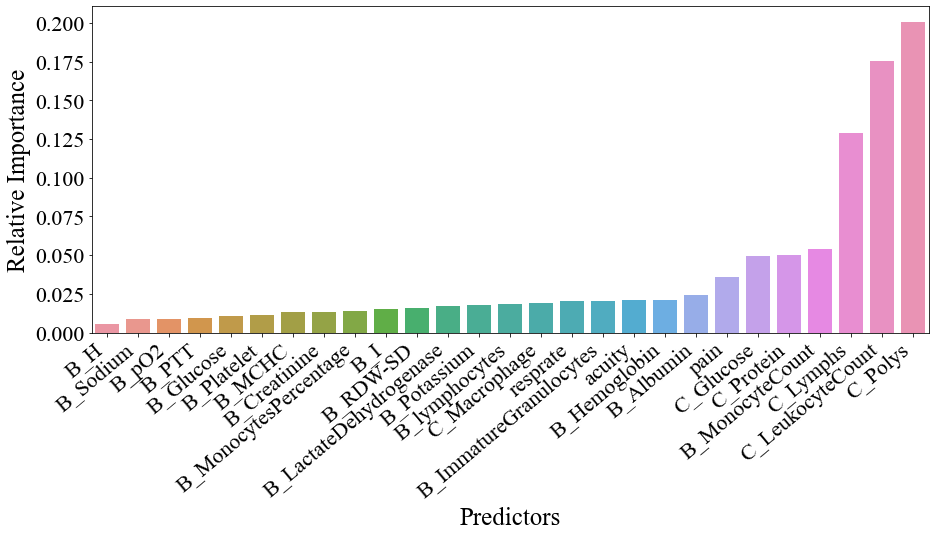

In [27]:
# visualize the weights
plt.figure(figsize=(15,6))  
ax = sns.barplot(x=rf_model_results['name'][-30:], y=rf_model_results['importance'][-30:])  # color='Gray'

plt.xticks(rotation=40,fontsize=22,ha='right')
plt.yticks(fontsize=22)

plt.ylabel('Relative Importance', fontsize=25)
plt.xlabel('Predictors', fontsize=25)
plt.show()

In [28]:
rf_model_results

,name,description,importance
4,B_H,B_H,0.005336
8,B_Sodium,B_Sodium,0.008521
0,B_pO2,B_pO2,0.008815
14,B_PTT,B_PTT,0.009532
3,B_Glucose,B_Glucose,0.010805
13,B_Platelet,B_Platelet,0.011501
11,B_MCHC,B_MCHC,0.013081
2,B_Creatinine,B_Creatinine,0.013095
12,B_MonocytesPercentage,B_MonocytesPercentage,0.014105
5,B_I,B_I,0.015529


In [29]:
rf_model_results1 = rf_model_results.copy()
rf_model_results1 = rf_model_results1.sort_values(['importance'],ascending=False)

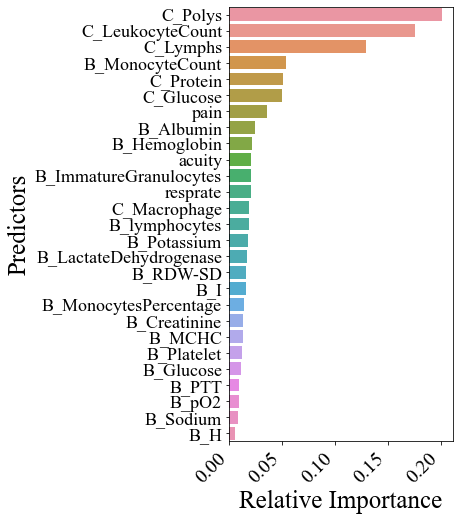

In [30]:
# visualize the weights
plt.figure(figsize=(4,8))  
ax = sns.barplot(y=rf_model_results1['name'][-30:], x=rf_model_results1['importance'][-30:])  # color='Gray'

plt.xticks(rotation=45,fontsize=20,ha='right')
plt.yticks(fontsize=18,rotation = 0)

plt.xlabel('Relative Importance', fontsize=25)
plt.ylabel('Predictors', fontsize=25)

plt.show()

In [31]:
# y1_predict = rf_model.predict(X_test)　　　　　　＃ RandomForestRegressor()
y1_predict = rf_model.predict_proba(X_test)[1]    #　RandomForestClassifier()
y1_predict

array([[0.50359527, 0.49640473],
       [0.39369896, 0.60630104],
       [0.43801628, 0.56198372],
       ...,
       [0.64135059, 0.35864941],
       [0.88685052, 0.11314948],
       [0.90017496, 0.09982504]])

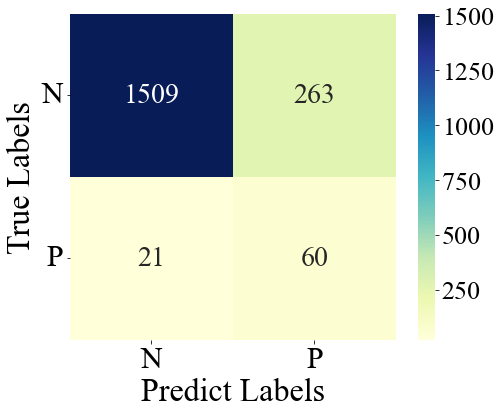

In [32]:
# generate confusion matrix
labels1 = ["N", "P"]
plt.figure(figsize = (8, 6))
cm = confusion_matrix(y1_test.values.argmax(axis=1),y1_predict.argmax(axis=1))
ax = sns.heatmap(cm, square=True, annot=True , cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".0f")   #square=True, annot=True showing number, fmt=".0f" showing true values
# plt.matshow(cm)
# plt.title('Confusion matrix RF', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

plt.xticks([i + 0.5 for i in range(len(label1_list))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(label1_list))], labels1, rotation = 0, fontsize=30)

plt.show()

In [33]:
cm

array([[1509,  263],
       [  21,   60]], dtype=int64)

In [34]:
predict_matrix = np.zeros(cm.shape)
for i in range(cm.shape[0]):
    temp = np.sum(cm[i])
    for j in range(cm.shape[1]):
        predict_matrix[i,j] = cm[i,j]/temp
predict_matrix

array([[0.85158014, 0.14841986],
       [0.25925926, 0.74074074]])

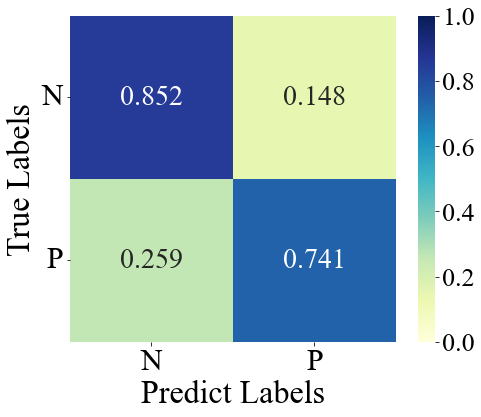

In [35]:
plt.figure(figsize = (8, 6))
# sns.heatmap(predict_matrix, square=True, annot=True ,cmap="YlGnBu")
ax = sns.heatmap(predict_matrix, square=True, annot=True ,cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".3f", vmin=0, vmax=1)
plt.xticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

# plt.title('Confusion matrix RF', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)

plt.show()

In [36]:
# calculate evaluation metric using test cohort
accuracy0 = np.round(accuracy_score(y1_test.values.argmax(axis=1), 
               y1_predict.argmax(axis=1)), decimals = 3)
print('\nRandom Forest Predictive Accuracy: ',accuracy0)


Random Forest Predictive Accuracy:  0.847


In [37]:
enc_gender = OneHotEncoder()
y_predict = enc_gender.fit_transform(y1_predict.argmax(axis=1).reshape(-1, 1)).toarray()
y_predict

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [38]:
print('\nSummary of Random Forest Precision and Recall\n') 
print(classification_report(y1_test.values, y_predict, 
                            target_names = labels1, digits=3))


Summary of Random Forest Precision and Recall

              precision    recall  f1-score   support

           N      0.986     0.852     0.914      1772
           P      0.186     0.741     0.297        81

   micro avg      0.847     0.847     0.847      1853
   macro avg      0.586     0.796     0.606      1853
weighted avg      0.951     0.847     0.887      1853
 samples avg      0.847     0.847     0.847      1853



In [39]:
from sklearn.metrics import confusion_matrix

y_true = y1_test.values.argmax(axis=1)
y_true = y_true.astype(int)
y_pred = y_predict.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

# The weights for each class
weights = np.bincount(y_true) / len(y_true)

# Weighted average sensitivity and specificity
weighted_avg_sensitivity = np.sum(weights * np.array([TPR, TNR]))
weighted_avg_specificity = np.sum(weights * np.array([TNR, TPR]))

print('Weighted avg sensitivity:', weighted_avg_sensitivity)
print('Weighted avg specificity:', weighted_avg_specificity)

Weighted avg sensitivity: 0.745585851895978
Weighted avg specificity: 0.8467350242849434


In [40]:
from sklearn.metrics import confusion_matrix

y_true = y1_test.values.argmax(axis=1)
y_true = y_true.astype(int)
y_pred = y_predict.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
sensitivity = TP/(TP+FN)
# Specificity or true negative rate
specificity = TN/(TN+FP) 

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 0.7407407407407407
specificity: 0.8515801354401806


In [41]:
y1_predict

array([[0.50359527, 0.49640473],
       [0.39369896, 0.60630104],
       [0.43801628, 0.56198372],
       ...,
       [0.64135059, 0.35864941],
       [0.88685052, 0.11314948],
       [0.90017496, 0.09982504]])

In [42]:
y1_test.values

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

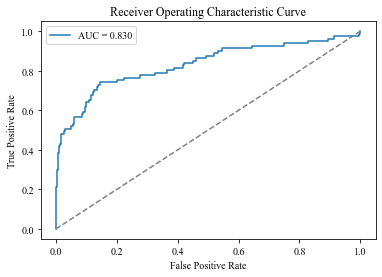

In [43]:
# Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc,roc_auc_score

# fpr, tpr, thresholds = roc_curve(label_true.ravel(), label_predict.ravel())
# auc = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y1_test.values[:,1], y1_predict[:,1])
auc = roc_auc_score(y1_test.values[:,1], y1_predict[:,1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

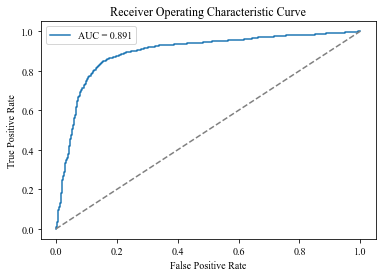

In [44]:
# Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y1_test.values.ravel(), y1_predict.ravel())
auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [45]:
X_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Polys,resprate,pain,acuity,C_LeukocyteCount
5161,78.778042,3.665183,0.5,102.0,3.000000,1.000000,272.779470,4.0,142.0,10.4,...,1.858302,0.940144,66.200000,45.0,6.972972,37.0,16.000000,0.000000,3.000000,2.00
3039,41.000000,3.338679,0.6,296.0,8.000000,1.000000,265.882295,3.5,138.0,12.1,...,0.959665,1.156379,42.900000,8.0,3.681771,90.0,18.000000,0.000000,2.000000,152.51
1241,145.582288,3.414762,1.0,89.0,8.000000,1.000000,272.467251,4.2,146.0,14.7,...,1.170514,0.344816,48.000000,13.0,11.938609,65.0,16.000000,4.000000,2.000000,5.00
4588,488.000000,3.200000,0.6,96.0,16.000000,0.000000,359.488047,4.0,142.0,10.6,...,0.570000,0.500000,42.500000,78.0,17.757443,0.0,18.578515,3.726252,2.005075,4.00
5002,142.038290,3.486210,0.8,118.0,3.924398,0.632547,201.000000,4.8,134.0,10.9,...,1.198786,1.484435,45.241190,77.0,12.425268,0.0,17.823758,3.275113,2.396721,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,101.000000,3.861070,0.5,139.0,6.759416,0.754793,367.977942,5.4,141.0,8.4,...,1.959750,1.416105,48.248408,0.0,35.226360,0.0,18.344292,5.827183,2.122913,0.00
6744,118.000000,2.800000,2.1,119.0,4.425524,0.801898,390.011174,3.5,140.0,9.3,...,1.031226,2.103880,46.889328,37.0,19.177778,23.0,18.894420,5.287765,2.000000,1.00
3350,167.550523,4.003031,0.9,90.0,1.000000,2.000000,178.919888,4.4,138.0,12.3,...,0.710000,0.400000,43.400000,91.0,10.295387,1.0,17.221728,2.202020,2.802475,8.24
7565,153.767014,3.400000,0.9,110.0,18.914176,1.000000,231.000000,4.4,137.0,11.4,...,0.860278,0.642561,42.085143,40.0,31.294515,0.0,19.497362,8.021703,2.650073,1.00


In [46]:
y_predict

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [47]:
y1_test

,Label_CultureN,Label_CultureP
5161,1.0,0.0
3039,1.0,0.0
1241,1.0,0.0
4588,1.0,0.0
5002,1.0,0.0
...,...,...
5228,1.0,0.0
6744,1.0,0.0
3350,1.0,0.0
7565,1.0,0.0


# AUPRC、C-index and Brier Score

FCN AUPRC: 0.464
Baseline (positive class ratio): 0.044


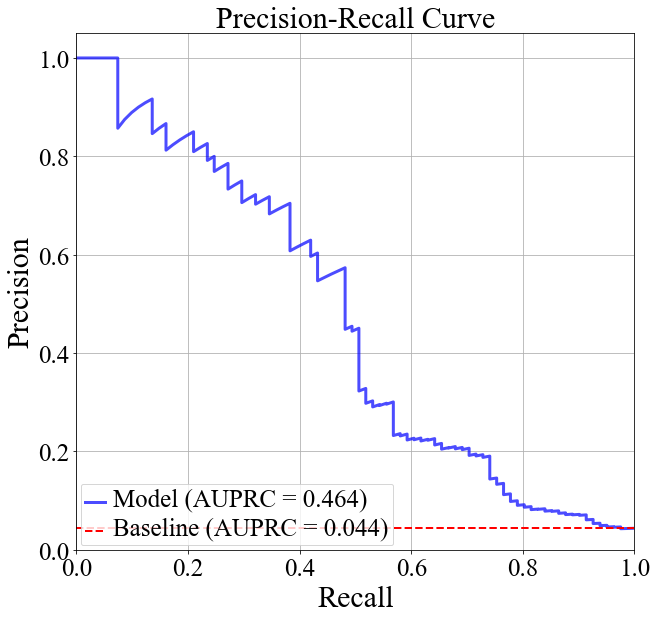

In [57]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, brier_score_loss
from lifelines.utils import concordance_index

# AUPRC
precision, recall, _ = precision_recall_curve(y1_test.values[:,1], y1_predict[:,1])
auprc = auc(recall, precision)
print(f'FCN AUPRC: {auprc:.3f}')

baseline = y1_test.Label_CultureP.value_counts()[1] / len(y1_test.values)
print(f'Baseline (positive class ratio): {baseline:.3f}')

plt.figure(figsize=(10, 9.5))
plt.plot(recall, precision, color='blue', label=f'Model (AUPRC = {auprc:.3f})', linewidth=3, alpha=0.7)

plt.axhline(y=baseline, color='red', linestyle='--', label=f'Baseline (AUPRC = {baseline:.3f})', linewidth=2)

plt.xlabel('Recall', fontsize=30, fontname='Times New Roman')
plt.ylabel('Precision', fontsize=30, fontname='Times New Roman')
plt.title('Precision-Recall Curve', fontsize=30, fontname='Times New Roman')

legend = plt.legend(loc='lower left')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(25)

plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=25, fontname='Times New Roman')
plt.yticks(fontsize=25, fontname='Times New Roman')

plt.show()

In [58]:
# C-index
# C-index is commonly used for survival analysis, but can also be used for classification tasks to measure the consistency of the model for survival or event ordering.
# For binary classification tasks, you can simply use the concordance_index function in lifelines.utils.
c_index = concordance_index(y1_test.values[:,1], y1_predict[:,1])
print(f'FCN C-index: {c_index:.3f}')

FCN C-index: 0.830


In [59]:
# Brier Score 
# Measures the mean square error between the model's predicted probability and the actual outcome.
brier_score = brier_score_loss(y1_test.values[:,1], y1_predict[:,1])
print(f'FCN Brier Score: {brier_score:.3f}')

FCN Brier Score: 0.138
